In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

grace = pd.read_csv('../data/grace_angola_watertower/grace_angola_watertower_timeseries.csv')

grace['year'] = pd.to_datetime(grace['date']).dt.year
grace_year = grace.groupby("year")[['lwe_mean_cm']].mean().reset_index()



# ensure datetime + sorted
g = grace.copy()
g["date"] = pd.to_datetime(g["date"])
g = g.sort_values("date")

fig, ax = plt.subplots(figsize=(10, 4))
line, = ax.plot(g["date"], g["lwe_mean_cm"], marker = '.', ls = ":", linewidth=1.)

# optional: show ±1σ band if available
if "lwe_std_cm" in g.columns:
    c = line.get_color()
    ax.fill_between(
        g["date"],
        g["lwe_mean_cm"] - g["lwe_std_cm"],
        g["lwe_mean_cm"] + g["lwe_std_cm"],
        alpha=0.2, facecolor=c, edgecolor="none"
    )

ax.set_xlabel("Date")
ax.set_ylabel("GRACE LWE (cm)")
ax.set_title("Okavango GRACE/GRACE-FO LWE — monthly")
ax.grid(True, linewidth=0.3)
fig.autofmt_xdate()
plt.tight_layout()
# plt.savefig("grace_okavango_timeseries.png", dpi=200)
plt.show()


In [99]:

annual_km2 = pd.read_csv("annual_flood_area_km2.csv")

In [100]:
annual_km2 = annual_km2.query('year > 2002')

In [101]:
annual_km2.head()

,Unnamed: 0,year,landsat_jas_mean_km2,landsat_max_km2,sentinel_jas_mean_km2,il_annual_km2
18,18,2003,NaN,2479.075934,NaN,5329.175005
19,19,2004,5412.617808,6180.814260,NaN,8208.494658
20,20,2005,4156.669053,5065.337718,NaN,6917.729975
21,21,2006,4660.161875,6519.217204,NaN,7425.152908
22,22,2007,4986.382046,5408.847893,NaN,8476.415905


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Prep GRACE annual means
grace['year'] = pd.to_datetime(grace['date']).dt.year
grace_year = (grace
              .groupby('year', as_index=False)[['lwe_mean_cm', 'lwe_std_cm']]
              .mean(numeric_only=True))

# 2) Load flood area and ensure a 'year' column
annual_km2 = pd.read_csv("annual_flood_area_km2.csv")

# 3) Merge on year
merged = (grace_year
          .merge(annual_km2, on='year', how='outer')
          .sort_values('year')
          .reset_index(drop=True)).query("year> 2000")




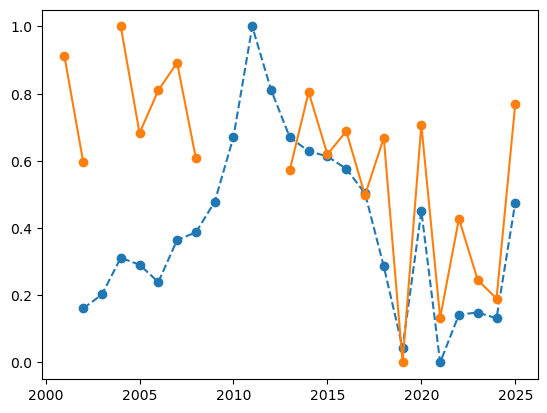

In [103]:
import numpy as np
s = grace_year.lwe_mean_cm/ grace_year.lwe_mean_cm.max()
plt.plot(grace_year.year, (s - s.min())/(s.max() - s.min()), 'o--')
t = merged.landsat_jas_mean_km2
plt.plot(merged.year, (t-t.min())/(t.max() - t.min()), 'o-', )



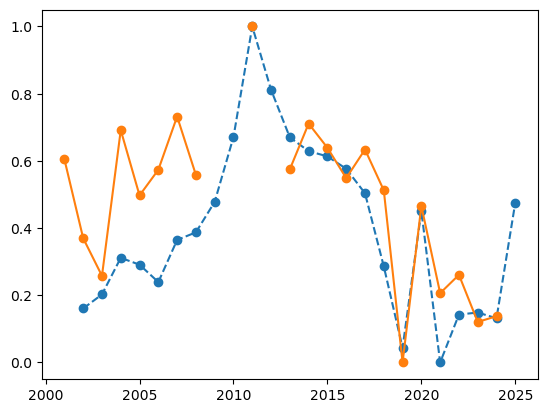

In [104]:
import numpy as np
s = grace_year.lwe_mean_cm/ grace_year.lwe_mean_cm.max()
plt.plot(grace_year.year, (s - s.min())/(s.max() - s.min()), 'o--')

t = merged.il_annual_km2
plt.plot(merged.year, (t-t.min())/(t.max() - t.min()), 'o-')

In [106]:
merged.query('year > 2004')[['landsat_jas_mean_km2', 'il_annual_km2',  
                             'landsat_max_km2', 'lwe_mean_cm',]].corr().round(2)

,landsat_jas_mean_km2,il_annual_km2,landsat_max_km2,lwe_mean_cm
landsat_jas_mean_km2,1.00,0.91,0.86,0.68
il_annual_km2,0.91,1.00,0.91,0.86
landsat_max_km2,0.86,0.91,1.00,0.65
lwe_mean_cm,0.68,0.86,0.65,1.00
